<a href="https://colab.research.google.com/github/anshuiitb/pytorch/blob/main/nn_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:

import numpy as np
np = np.random.rand(3,4)
np

array([[0.36464302, 0.84785159, 0.7570255 , 0.29714777],
       [0.69829336, 0.58696358, 0.98697021, 0.76262183],
       [0.59368053, 0.83658739, 0.20117087, 0.80216835]])

In [ ]:
np.dtype

dtype('float64')

In [ ]:
tensor = torch.rand(3,4)
tensor

tensor([[0.6829, 0.9829, 0.6268, 0.3526],
        [0.6710, 0.8218, 0.3285, 0.8557],
        [0.0914, 0.9276, 0.5818, 0.5456]])

In [ ]:
tensor = torch.tensor(np)

In [ ]:
tensor

tensor([[0.8473, 0.5486, 0.4897, 0.7498],
        [0.8067, 0.6665, 0.1211, 0.1356],
        [0.7646, 0.9210, 0.0066, 0.0583]], dtype=torch.float64)

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#reshape and view
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#reshape also if we don't know the item range , using -1
my_torch2= torch.arange(15)
my_torch2 = my_torch2.reshape(-1 ,3)
my_torch2

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [ ]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch4 = my_torch3.view(-1,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#with reshape and view , they will update

In [ ]:
#slices , grab a section of your tensor
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch5[7]

tensor(7)

In [ ]:
my_torch6 = my_torch5.reshape(5,2)
my_torch6

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
my_torch6[:,1]

tensor([1, 3, 5, 7, 9])

In [ ]:
my_torch6[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [ ]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [ ]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [ ]:
tensor_a / tensor_b # ** power


tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [ ]:
tensor_a.add_(tensor_b) # permanent changes in tensor_a

simple NN

In [104]:
import os
import json
import torch
!pip install kaggle


In [105]:

kaggle_directory = json.load(open('kaggle.json'))
os.environ["KAGGLE_USERNAME"] = kaggle_directory["username"]
os.environ["KAGGLE_KEY"] = kaggle_directory["key"]

In [106]:
import kaggle
kaggle.api.dataset_download_files('uciml/iris', path='./data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/uciml/iris


In [107]:
!ls

data  kaggle.json  sample_data


In [108]:
import pandas as pd

df = pd.read_csv('/content/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
import torch.nn as nn
import torch.nn.functional as F

In [111]:
class Model(nn.Module):
  def __init__(self , in_features = 4, h1 = 8 , h2 = 9 , out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features , h1)
    self.fc2 = nn.Linear(h1 , h2)
    self.out = nn.Linear(h2 , out_features)


  def forward(self , x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [112]:
torch.manual_seed(41)
model = Model()

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
df["Species"] =df["Species"].replace("Iris-setosa", 0)

df["Species"] =df["Species"].replace("Iris-versicolor" , 1)

df["Species"]  = df["Species"].replace("Iris-virginica" , 2)

/tmp/ipython-input-115-671949655.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"]  = df["Species"].replace("Iris-virginica" , 2)


In [116]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [117]:
x = df.drop(columns=["Species", "Id"])
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [118]:
y = df["Species"]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [119]:
x = x.values
y = y.values

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train , X_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 41)

In [122]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[1 1 2 1 2]


In [123]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [124]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [125]:
epochs = 100
losses = []

In [126]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [127]:
for i in range(epochs):
  #get a predict
  y_pred=model.forward(X_train)
  #measure loss
  loss = criterion(y_pred , y_train)
  #keep track of our losses
  losses.append(loss.detach().numpy())


  #print every 10 epoch

  if i % 10 ==0 :
    print(f'Epoch : {i} and loss: {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss: 1.1251550912857056
Epoch : 10 and loss: 1.0096259117126465
Epoch : 20 and loss: 0.8157405853271484
Epoch : 30 and loss: 0.585706353187561
Epoch : 40 and loss: 0.3999636471271515
Epoch : 50 and loss: 0.26768800616264343
Epoch : 60 and loss: 0.17942364513874054
Epoch : 70 and loss: 0.12151692062616348
Epoch : 80 and loss: 0.0860118493437767
Epoch : 90 and loss: 0.06520849466323853


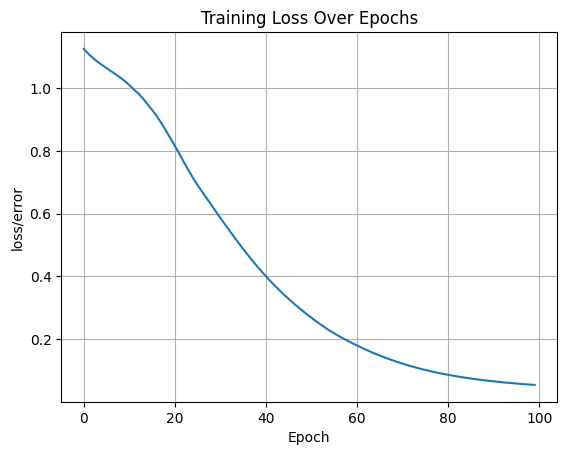

In [128]:
# Now plot
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

In [129]:
# model evaluation
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval , y_test)

In [130]:
loss

tensor(0.1315)

In [131]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):7.3f}% correct')

 1. tensor([-5.8760,  4.4628,  6.5124])    	 2
 2. tensor([-7.5436,  4.1670,  9.7255])    	 2
 3. tensor([-8.4504,  5.1271, 10.1987])    	 2
 4. tensor([-4.3398,  5.6267,  2.5608])    	 1
 5. tensor([-7.1825,  4.8754,  8.2992])    	 2
 6. tensor([-3.3974,  5.3463,  1.2803])    	 1
 7. tensor([-5.9231,  4.9822,  5.9997])    	 2
 8. tensor([-4.2881,  5.7003,  2.3889])    	 1
 9. tensor([-6.5356,  4.9257,  7.1260])    	 2
10. tensor([-8.0509,  4.4129, 10.3286])    	 2
11. tensor([-5.6762,  4.9500,  5.6215])    	 2
12. tensor([ 4.5662, -2.2476, -2.8911])    	 0
13. tensor([ 4.2571, -1.9967, -2.7330])    	 0
14. tensor([-2.1108,  4.0515,  0.5799])    	 1
15. tensor([ 3.4575, -1.2098, -2.3514])    	 0
16. tensor([-5.4724,  5.1165,  5.0934])    	 2
17. tensor([ 4.0557, -1.7949, -2.6492])    	 0
18. tensor([-5.8075,  4.6053,  6.2458])    	 1
19. tensor([ 4.4343, -2.1392, -2.8242])    	 0
20. tensor([ 3.4527, -1.2514, -2.3660])    	 0
21. tensor([-2.6189,  4.5619,  0.8574])    	 1
22. tensor([-

In [132]:
new_iris = torch.tensor([4.7 , 3.2  ,1.3 , 0.2])

In [133]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [134]:
newr_iris = torch.tensor([5.9 , 3.0 , 5.1 , 1.8])

In [135]:
with torch.no_grad():
  print(model(newr_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [136]:
torch.save(model.state_dict() , 'iris_model') # saving model

In [137]:
#loading the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model'))

<All keys matched successfully>

In [138]:
new_model.eval() #making sure

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)